# <center> 👉 class_11_6 » _Deep Learning based Text Recognition (OCR) using Tesseract and OpenCV_ </center>  

# OCR (Optical Character Recognition)

The method of extracting text from images is called Optical Character Recognition (OCR) or sometimes text recognition.  
Tesseract was originally developed at Hewlett-Packard Laboratories Bristol UK and at Hewlett-Packard Co, Greeley Colorado USA between 1985 and 1994, with some more changes made in 1996 to port to Windows, and some C++izing in 1998.   
In 2005 Tesseract was open sourced by HP. From 2006 until November 2018 it was developed by Google.
Major version 5 is the current stable version and started with release 5.0.0 on November 30, 2021.

## Install Tesseract     
https://tesseract-ocr.github.io/tessdoc/  

Tesseract is an optical image recognition engine that runs on various operating systems.   
It can detect more than 100 languages from all over the world. Tesseract is originally written in C/C++.   
But we are going to use it in python.    
Tesseract engine works with RGB image  

- [Windows - Tesseract at UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki)  
- download : tesseract-ocr-w64-setup-5.3.3.20231005.exe (64 bit)  for window
- Additional Language : select Korean or Other Language  
<img src='./images/tsract_img_01.png'  width=400 height=400>  

### ✓ Challenges with Tesseract

- Tesseract doesn’t perform well if the image contains a lot of noise.
- If the font of any language is not trained then tesseract cannot detect that language accurately.
- Image brightness or skewness may affect Tesseract’s performance as well.

### ■ text = pytesseract.image_to_string(img, config=config)  
- config = '-l eng --oem 1 --psm 3'
- Define config parameters.
>- '-l eng'  for using the English language
>- '--oem 1' sets the OCR Engine Mode to LSTM only.
>-  There are four OCR Engine Mode (oem) available
>>-  0    Legacy engine only.
>>-  1    Neural nets LSTM engine only.
>>-  2    Legacy + LSTM engines.
>>-  3    Default, based on what is available.
>-  '--psm 3' sets the Page Segmentation Mode (psm) to auto.
>>- 0  : Orientation and script detection (OSD) only.
>>- 1  : Automatic page segmentation with OSD.
>>- 2  : Automatic page segmentation, but no OSD, or OCR.
>>- 3  : Fully automatic page segmentation, but no OSD. (Default)
>>- 4  : Assume a single column of text of variable sizes.
>>- 5  : Assume a single uniform block of vertically aligned text.
>>- 6  : Assume a single uniform block of text.
>>- 7  : Treat the image as a single text line.
>>- 8  : Treat the image as a single word.
>>- 9  : Treat the image as a single word in a circle.
>>- 10 : Treat the image as a single character.
>>- 11 : Sparse text. Find as much text as possible in no particular order.
>>- 12 : Sparse text with OSD.
>>- 13 : Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

In [6]:
!pip install pytesseract

## Extract Text

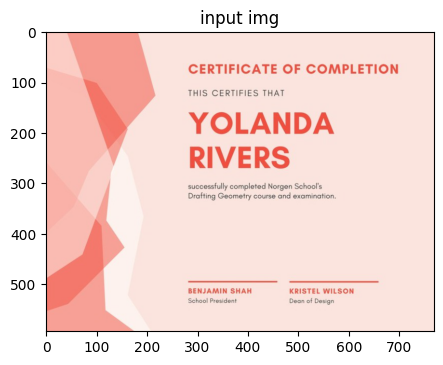

CERTIFICATE OF COMPLETION

THIS CERTIFIES THAT

YOLANDA
RIVERS

successfully completed Norgen School's
Drafting Geometry course and examination.

BENJAMIN SHAH KRISTEL WILSON
‘School President Dean of Design




In [17]:
import cv2
import sys
import pytesseract
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(5, 5), dpi=100)
config = '-l eng --oem 1 --psm 3'

img = cv2.imread('./images/practice_img/textimg.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb),plt.title('input img')
plt.show()

text = pytesseract.image_to_string(img_rgb, config=config) # Run tesseract OCR on image

# Print recognized text
print(text)


### each detected character and their bounding boxes

In [18]:
# Return each detected character and their bounding boxes. 
boxes = pytesseract.image_to_boxes(img_rgb)
print(boxes)

C 282 509 301 529 0
E 305 509 316 529 0
R 320 509 334 529 0
T 336 509 351 529 0
I 354 509 359 529 0
F 363 509 374 529 0
I 378 509 405 529 0
C 397 509 416 529 0
A 408 509 426 528 0
T 428 509 443 529 0
E 446 509 457 529 0
O 469 509 489 529 0
F 492 509 504 529 0
C 516 509 535 529 0
O 538 509 557 529 0
M 560 509 584 529 0
P 587 509 601 529 0
L 604 509 615 529 0
E 619 509 630 529 0
T 633 509 648 529 0
I 651 509 656 529 0
O 659 509 679 529 0
N 682 509 698 529 0
T 282 465 289 478 0
H 292 465 301 477 0
I 305 465 307 477 0
S 310 465 320 478 0
C 329 465 341 478 0
E 344 465 352 478 0
R 356 465 364 478 0
T 367 465 374 478 0
I 377 465 379 477 0
F 383 465 391 478 0
I 394 465 396 477 0
E 400 465 408 478 0
S 411 465 420 478 0
T 430 465 437 478 0
H 440 465 449 477 0
A 452 465 462 478 0
T 465 465 472 478 0
Y 282 390 323 433 0
O 326 389 370 434 0
L 376 390 401 433 0
A 404 390 446 433 0
N 451 390 485 433 0
D 492 390 526 433 0
A 529 390 571 433 0
R 285 322 316 366 0
I 320 322 330 366 0
V 335 322 377 366 0


- the first column contains recognized characters, and the 2nd, 3rd, 4th, and 5th columns contain their boundaries.

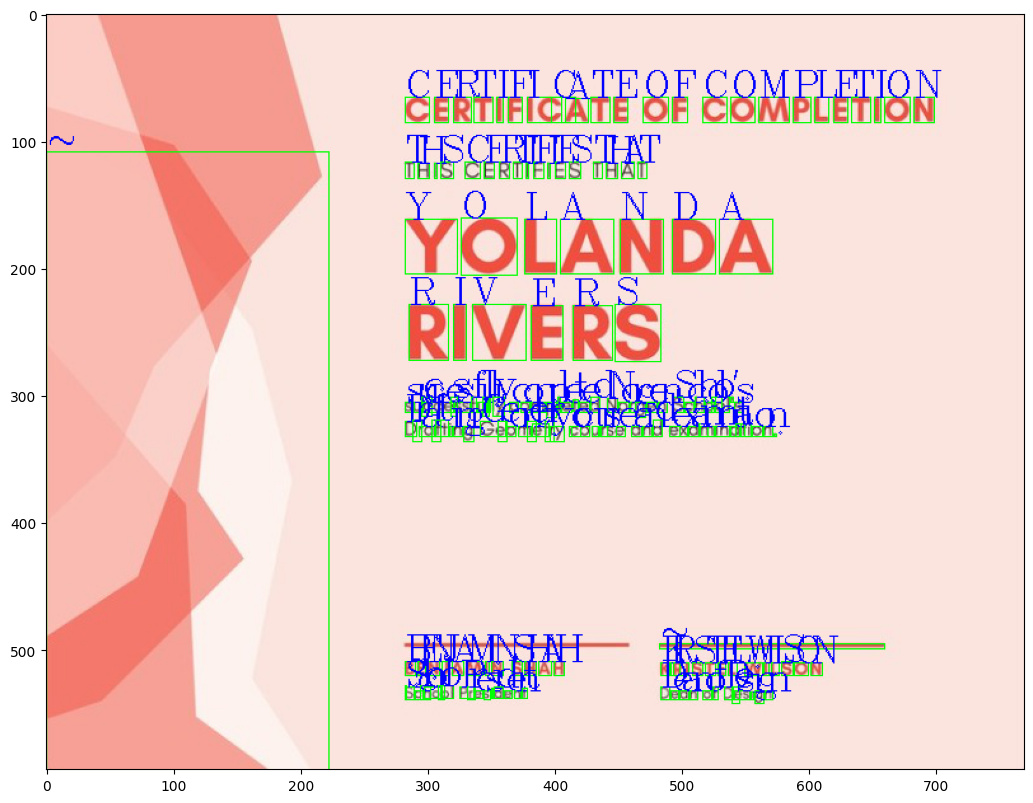

In [19]:
img = cv2.imread('./images/practice_img/textimg.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def draw_boxes_on_character(img):
    img_width = img.shape[1]
    img_height = img.shape[0]
    boxes = pytesseract.image_to_boxes(img)
    for box in boxes.splitlines():
        box = box.split(" ")
        character = box[0]
        x = int(box[1])
        y = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])
        cv2.rectangle(img, (x, img_height - y), (x2, img_height - y2), (0, 255, 0), 1)
        cv2.putText(img, character, (x, img_height -y2), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
    return img
img = draw_boxes_on_character(img)
figure(figsize=(15, 10), dpi=100)
plt.imshow(img)        
plt.show()

## how we can extract the data we need.  

- raw data information about the detected texts

In [20]:
# Return raw information about the detected texts
raw_data = pytesseract.image_to_data(img)
print(raw_data )

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	769	594	-1	
2	1	1	0	0	0	346	95	36	1	-1	
3	1	1	1	0	0	346	95	36	1	-1	
4	1	1	1	1	0	346	95	36	1	-1	
5	1	1	1	1	1	346	95	36	1	95.000000	 
2	1	2	0	0	0	282	44	422	86	-1	
3	1	2	1	0	0	282	44	422	86	-1	
4	1	2	1	1	0	282	44	422	42	-1	
5	1	2	1	1	1	282	44	229	42	0.000000	CERMPICAnE
5	1	2	1	1	2	478	40	33	65	70.360680	OF
5	1	2	1	1	3	516	44	188	42	0.000000	SSMELEHION
4	1	2	1	2	0	351	95	132	35	-1	
5	1	2	1	2	1	351	101	70	9	18.051392	eRe
5	1	2	1	2	2	434	91	49	55	32.192886	ea
2	1	3	0	0	0	359	44	4	75	-1	
3	1	3	1	0	0	359	44	4	75	-1	
4	1	3	1	1	0	359	44	4	75	-1	
5	1	3	1	1	1	359	44	4	75	95.000000	 
2	1	4	0	0	0	349	69	4	49	-1	
3	1	4	1	0	0	349	69	4	49	-1	
4	1	4	1	1	0	349	69	4	49	-1	
5	1	4	1	1	1	349	69	4	49	95.000000	 
2	1	5	0	0	0	344	116	22	1	-1	
3	1	5	1	0	0	344	116	22	1	-1	
4	1	5	1	1	0	344	116	22	1	-1	
5	1	5	1	1	1	344	116	22	1	95.000000	 
2	1	6	0	0	0	0	108	1	380	-1	
3	1	6	1	0	0	0	108	1	380	-1	
4	1	6	1	1	0	0	108	1	38

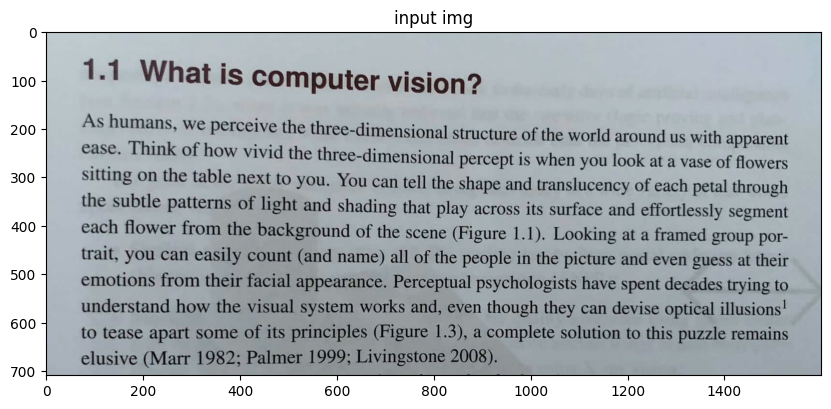

1.1 What is computer vision?

As humans, We perceive the three-dimensional structure of the world around us with apparent
case. Think of how vivid the three-dimensional percept is when you look at a vase of flowers
sitting on the table next to you. You can tell the shape and translucency of each petal through
the subtle patterns of light and shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait, you can easily count (and name) all of the people in the picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though they can devise optical illusions!
to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008).



In [91]:
config = '-l eng --oem 1 --psm 3'
figure(figsize=(10, 10), dpi=100)

im = cv2.imread('./images/practice_img/ocr1.jpg', cv2.IMREAD_COLOR)
plt.imshow(im),plt.title('input img')
plt.show()

text = pytesseract.image_to_string(im, config=config) # Run tesseract OCR on image

# Print recognized text
print(text)

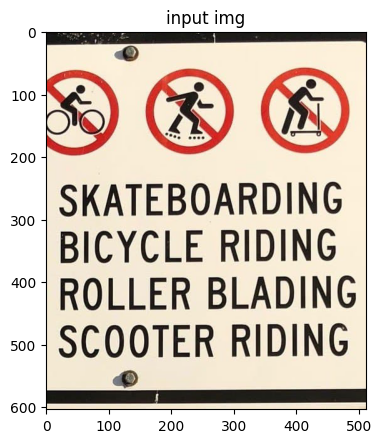

os & ix

SKATEBOARDING

BICYCLE RIDING

ROLLER BLADING

SCOOTER RIDING
®



In [93]:
config = '-l eng --oem 1 --psm 3'
figure(figsize=(5, 5), dpi=100)
im = cv2.imread('./images/practice_img/ocr_street_sign2.jpg', cv2.IMREAD_COLOR)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb),plt.title('input img')
plt.show()
text = pytesseract.image_to_string(im_rgb, config=config) # Run tesseract OCR on image
print(text)

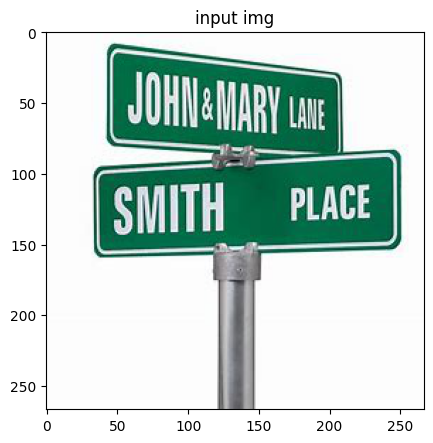

OHA we
SMITH PLACE




In [5]:
config = '-l eng --oem 1 --psm 3'
figure(figsize=(5, 5), dpi=100)
img = cv2.imread('./images/practice_img/ocr_street_sign3.jpg', cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img3),plt.title('input img')
plt.show()
text = pytesseract.image_to_string(img3, config=config) # Run tesseract OCR on image
print(text)

You can see some background clutter, and the text is surrounded by a rectangle.
Tesseract does not do a very good job with dark boundaries and often assumes it to be text.

## Extracting particular text associated value from an image

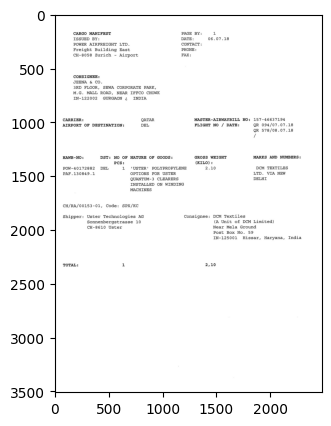

CARGO MANIFEST
ISSUED BY:
POWER AIRFREIGHT LTD.

Freight Building East
CH-8058 Zurich - Airport

CONSIGNEE:
JHENA & CO.

PAGE BY: 1

DATE:

06.07.18

CONTACT :

3RD FLOOR, SEWA CORPORATE PARK,

M.G. MALL ROAD, NEAR
IN-122002 GURGAON ¢

CARRIER:
AIRPORT OF DESTINATION:

HAWB-NO: DST: NO OF
PCS:
POW-40172882 DEL 1

PAF.130849.1

IFFCO CHOWK

CH/RA/00153-01, Code: SPX/KC

Shipper: Uster Technologi
Sonnenbergstrass
CH-8610 Uster

TOTAL: 1

PHONE:
FAX:

INDIA
QATAR MASTER-AIRWAYBILL NO: 157-46637194
DEL FLIGHT NO / DATE: QR 094/07.07.18
QR 578/08.07.18
/
NATURE OF GOODS: GROSS WEIGHT MARKS AND NUMBERS:
(KILO) :
'USTER' POLYPROPYLENE 2.10 DCM TEXTILES
OPTIONS FOR USTER LTD. VIA NEW
QUANTUM-3 CLEARERS DELHI
INSTALLED ON WINDING
MACHINES
es AG Consignee: DCM Textiles

e 10

(A Unit of DCM Limited)

Near Mela Ground

Post Box No. 59

IN-125001 Hissar, Haryana, India



In [96]:
from PIL import Image
import pytesseract, re
config = '-l eng --oem 3 --psm 3'
figure(figsize=(5, 5), dpi=100)

im = cv2.imread('./images/practice_img/invoice.jpg', cv2.IMREAD_COLOR)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.show()
text = pytesseract.image_to_string(im_rgb, config=config) # Run tesseract OCR on image
print(text)

In [97]:
f = './images/practice_img/invoice.jpg'
t = pytesseract.image_to_string(Image.open(f))
m = re.findall(r"MASTER-AIRWAYBILL NO: [\d—-]+", t)
if m:
    print(m[0])

MASTER-AIRWAYBILL NO: 157-46637194


## Korean w/Eng

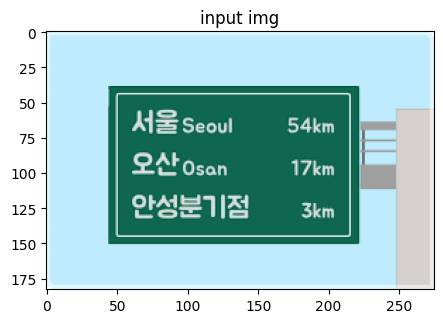

서물5604 5400

오산0500         770
SSSA 300




In [15]:
config = '-l kor+eng --oem 1 --psm 3'
figure(figsize=(5, 5), dpi=100)
im = cv2.imread('./images/practice_img/ocr_street_sign6.jpg', cv2.IMREAD_COLOR)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.title('input img')
plt.show()
text = pytesseract.image_to_string(im_rgb, config=config) 
print(text)

## Lisence Plate

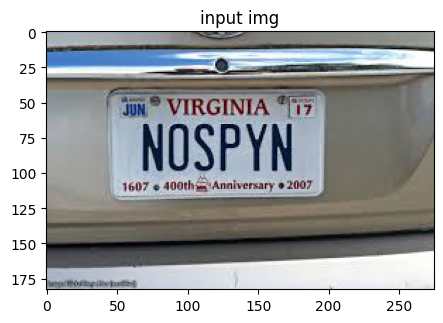

“NOSPYN.
  --psm 11


In [16]:
config = '-l eng --oem 3 --psm 11'
figure(figsize=(5, 5), dpi=100)
im = cv2.imread('./images/practice_img/ocr2.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)),plt.title('input img')
plt.show()
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(img_gray, config=config) # Run tesseract OCR on image
print(text,' --psm 11' )

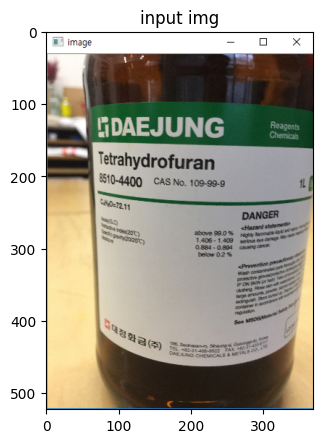

image

fs]

x

fDAEJUNG

Tetrahydrofuran

8510-4400 CAS No. 108-999

af

Sater

=

above 200%

Si

=e

a

Tae 1809

sao

foienst

bee 02%

ervetn

wee

ssa

Faces

reg

=

nos

Vy

—

se sal

a
  --psm 11


In [27]:
config = '-l eng --oem 3 --psm 11'
figure(figsize=(5, 5), dpi=100)
im = cv2.imread('./images/practice_img/ocr3.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)),plt.title('input img')
plt.show()
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(img_gray, config=config) # Run tesseract OCR on image
print(text,' --psm 11' )